In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

file_path = "telecom_churn.csv"
def load_and_preprocess_data(file_path):
    # Load the data
    df = pd.read_csv(file_path)
    
    # Basic Data Cleaning
    # Handling missing values by dropping rows with missing target values
    df.dropna(subset=['churn'], inplace=True)
    
    # Fill missing values in other columns with median
    df.fillna(df.median(), inplace=True)

    # Encode categorical variables
    label_encoders = {}
    for column in df.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le
    
    # Split features and target
    X = df.drop('churn', axis=1)
    y = df['churn']
    
    # Split into training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    return X_train, X_test, y_train, y_test, label_encoders


X_train, X_test, y_train, y_test, label_encoders = load_and_preprocess_data(file_path)
print(X_train, X_test, y_train, y_test, label_encoders)

      accountweeks  contractrenewal  dataplan  datausage  custservcalls  \
817            243                1         0       0.00              2   
1373           108                1         0       0.00              4   
679             75                0         0       0.00              1   
56             141                1         0       0.00              1   
1993            86                1         0       0.35              0   
...            ...              ...       ...        ...            ...   
1095           106                1         0       0.00              1   
1130           122                1         0       0.00              1   
1294            66                1         0       0.24              1   
860            169                1         0       0.00              2   
3174            36                1         1       2.32              2   

      daymins  daycalls  monthlycharge  overagefee  roammins  
817      95.5        92           31

Dataset shape: (3333, 11)
Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   churn            3333 non-null   int64  
 1   accountweeks     3333 non-null   int64  
 2   contractrenewal  3333 non-null   int64  
 3   dataplan         3333 non-null   int64  
 4   datausage        3333 non-null   float64
 5   custservcalls    3333 non-null   int64  
 6   daymins          3333 non-null   float64
 7   daycalls         3333 non-null   int64  
 8   monthlycharge    3333 non-null   float64
 9   overagefee       3333 non-null   float64
 10  roammins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB
None
Summary statistics:
             churn  accountweeks  contractrenewal     dataplan    datausage  \
count  3333.000000   3333.000000      3333.000000  3333.000000  3333.000000   
mean      0.144914  

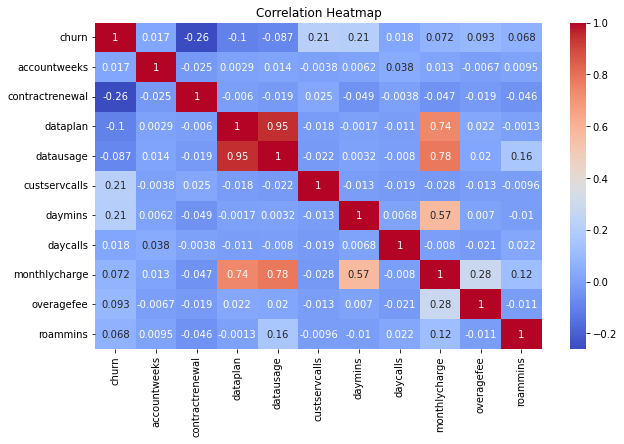

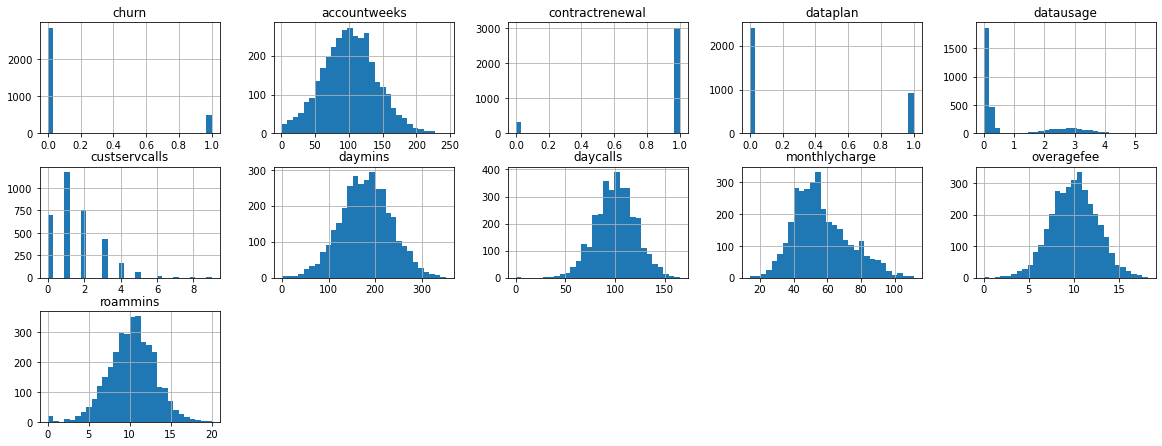

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

def perform_eda(df):
    # Print basic stats
    print("Dataset shape:", df.shape)
    print("Dataset info:")
    print(df.info())
    
    # Summary statistics
    print("Summary statistics:")
    print(df.describe())
    
    # Check for missing values
    print("Missing values per column:")
    print(df.isnull().sum())
    
    # Correlation heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
    plt.title("Correlation Heatmap")
    plt.show()
    
    # Distribution plots for numerical columns
    df.hist(bins=30, figsize=(20, 10), layout=(4, 5))
    plt.show()

df = pd.read_csv(file_path)
perform_eda(df)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib
import warnings
warnings.filterwarnings("ignore")

def train_baseline_model(X_train, y_train, X_test, y_test):
    # Initialize the model
    model = LogisticRegression(random_state=42)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Baseline Model Accuracy:", accuracy)
    
    joblib.dump(model, "model.joblib")
    
    return model


model = train_baseline_model(X_train, y_train, X_test, y_test)

predictions = model.predict([df.iloc[3,1:]])
print("target predicted is :",predictions[0])

Baseline Model Accuracy: 0.8470764617691154
target predicted is : 1


In [ ]:
import shap

def explain_model(model, X_train):
    # Initialize SHAP explainer with model's predict_proba method
    explainer = shap.Explainer(model.predict_proba, X_train)
    
    # Generate SHAP values
    shap_values = explainer(X_train)
    
    # Summary plot
    shap.summary_plot(shap_values, X_train)

# Assuming model is trained and X_train is available
explain_model(model, X_train)

ExactExplainer explainer:  91%|█████████ | 2423/2666 [00:50<00:04, 50.72it/s]

In [4]:
pip install shap

  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\AVANTHICA\\AppData\\Local\\Temp\\pip-uninstall-b1nbrrxn\\core\\_multiarray_tests.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.

